In [39]:
import requests
import unicodedata
from bs4 import BeautifulSoup

In [40]:
url = 'https://imt-mines-albi.hal.science/CGI/search/index/?qa%5BdocType_s%5D%5B%5D=ART+OR+POSTER+OR+PROCEEDINGS+OR+ISSUE+OR+OUV+OR+COUV+OR+BLOG+OR+NOTICE+OR+TRAD+OR+PATENT+OR+OTHER+OR+UNDEFINED+OR+REPORT+OR+THESE+OR+HDR+OR+LECTURE+OR+MEM+OR+IMG+OR+VIDEO+OR+SON+OR+MAP+OR+SOFTWARE+OR+PRESCONF+OR+CREPORT+OR+NOTE+OR+OTHERREPORT+OR+REPACT+OR+SYNTHESE&qa%5BpublicationDateY_i%5D%5B%5D=2019+OR+2020+OR+2021+OR+2022+OR+2023+OR+2024&rows=30&page='
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
}

results = []
for i in range(1,7):
    response = requests.get(f'{url}{i}', headers=headers)
    base_url = 'https://imt-mines-albi.hal.science'
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Récupérer tous les <tr>
        rows = soup.find_all('tr')
        
        
        # Parcourir chaque <tr>
        for row in rows:
            # Trouver tous les <a> dans le <tr>
            all_a_tags = row.find_all('a')
            
            # Vérifier qu'il y a un deuxième <a>
            if len(all_a_tags) > 1:
                second_a = all_a_tags[1]
                
                # Récupérer le href du deuxième <a>
                href = second_a.get('href', 'Pas de href')
                
                # Récupérer le contenu du <h3>, si disponible
                h3_element = second_a.find('h3', class_='title-results')
                h3_text = h3_element.text.strip() if h3_element else 'Pas de h3'
                
                # Ajouter les résultats
                full_url = base_url + href
                if h3_text!='Pas de h3':
                   results.append((full_url, h3_text))
        
    else:
        print(f"Erreur : {response.status_code}")


In [41]:
def normalize_text(text):
    """Normalize text to remove accents and convert to lowercase."""
    return unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8').lower()

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
}

final = []
for result in results:
    link = result[0]
    response = requests.get(link, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract keywords
        keyword_classes = ['keys-lang en active', 'keys-lang fr active']
        all_keywords = []
        for keyword_class in keyword_classes:
            keyword_div = soup.find('div', class_=keyword_class)
            if keyword_div:
                keywords = keyword_div.find_all('a', class_='hal-bgtext')
                for keyword in keywords:
                    all_keywords.append(keyword.text.strip())

        # Extract abstract
        abstract = []
        abstract_div = soup.find('div', class_='abstract-content active')
        if abstract_div:
            abstract.append(abstract_div.text.strip())

        # Extract domaines
        domaines = []
        domaines_div = soup.find('div', class_='domains')
        if domaines_div:
            domain_links = domaines_div.find_all('a', class_='hal-bgtext')
            for link in domain_links:
                domaines.append(link.text.strip())

        # Extract publication date
        publication_date = None
        publication_meta = soup.find('meta', {'name': 'citation_publication_date'})
        if publication_meta:
            publication_date = publication_meta.get('content', None)

        # Extract authors and filter by institution
        authors = []
        author_metas = soup.find_all('meta', {'name': 'citation_author'})
        institution_metas = soup.find_all('meta', {'name': 'citation_author_institution'})
        
        for author_meta, institution_meta in zip(author_metas, institution_metas):
            author_name = author_meta.get('content', None)
            institution = institution_meta.get('content', None)
            if institution and "centre genie industriel" in normalize_text(institution):
                authors.append(author_name)
        
        # Append data only if relevant authors are found
        if authors:
            final.append([result[1], all_keywords, domaines, abstract, publication_date, authors])

    else:
        print(f"Erreur lors de la requête sur {link}, code {response.status_code}")


In [42]:
url='https://imt-mines-albi.hal.science/CGI/search/index/?qa%5BdocType_s%5D%5B%5D=COMM&qa%5BconferenceStartDateY_i%5D%5B%5D=2019+OR+2020+OR+2021+OR+2022+OR+2023+OR+2024&rows=30&page='
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
}

results2 = []
for i in range(1,7):
    response = requests.get(f'{url}{i}', headers=headers)
    base_url = 'https://imt-mines-albi.hal.science'
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Récupérer tous les <tr>
        rows = soup.find_all('tr')
        
        
        # Parcourir chaque <tr>
        for row in rows:
            # Trouver tous les <a> dans le <tr>
            all_a_tags = row.find_all('a')
            
            # Vérifier qu'il y a un deuxième <a>
            if len(all_a_tags) > 1:
                second_a = all_a_tags[1]
                
                # Récupérer le href du deuxième <a>
                href = second_a.get('href', 'Pas de href')
                
                # Récupérer le contenu du <h3>, si disponible
                h3_element = second_a.find('h3', class_='title-results')
                h3_text = h3_element.text.strip() if h3_element else 'Pas de h3'
                
                # Ajouter les résultats
                full_url = base_url + href
                if h3_text!='Pas de h3':
                   results2.append((full_url, h3_text))
        
    else:
        print(f"Erreur : {response.status_code}")


In [43]:
def normalize_text(text):
    """Normalize text to remove accents and convert to lowercase."""
    return unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8').lower()

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'
}

for result in results2:
    link = result[0]
    response = requests.get(link, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract keywords
        keyword_classes = ['keys-lang en active', 'keys-lang fr active']
        all_keywords = []
        for keyword_class in keyword_classes:
            keyword_div = soup.find('div', class_=keyword_class)
            if keyword_div:
                keywords = keyword_div.find_all('a', class_='hal-bgtext')
                for keyword in keywords:
                    all_keywords.append(keyword.text.strip())

        # Extract abstract
        abstract = []
        abstract_div = soup.find('div', class_='abstract-content active')
        if abstract_div:
            abstract.append(abstract_div.text.strip())

        # Extract domaines
        domaines = []
        domaines_div = soup.find('div', class_='domains')
        if domaines_div:
            domain_links = domaines_div.find_all('a', class_='hal-bgtext')
            for link in domain_links:
                domaines.append(link.text.strip())

        # Extract publication date
        publication_date = None
        publication_meta = soup.find('meta', {'name': 'citation_publication_date'})
        if publication_meta:
            publication_date = publication_meta.get('content', None)

        # Extract authors and filter by institution
        authors = []
        author_metas = soup.find_all('meta', {'name': 'citation_author'})
        institution_metas = soup.find_all('meta', {'name': 'citation_author_institution'})
        
        for author_meta, institution_meta in zip(author_metas, institution_metas):
            author_name = author_meta.get('content', None)
            institution = institution_meta.get('content', None)
            if institution and "centre genie industriel" in normalize_text(institution):
                authors.append(author_name)
        
        # Append data only if relevant authors are found
        if authors:
            final.append([result[1], all_keywords, domaines, abstract, publication_date, authors])

    else:
        print(f"Erreur lors de la requête sur {link}, code {response.status_code}")


In [44]:
len(final)

303

In [45]:
import pandas as pd
df = pd.DataFrame(final, columns=["Paper Name", "Keywords", "Domains", "Abstract", "Publication Date", "Author"])
df.head()

,Paper Name,Keywords,Domains,Abstract,Publication Date,Author
0,Démarche outillée d'analyse du déroulement du ...,[],[Sciences de l'ingénieur [physics]],[],2022/09/01,"[Leah Rifi, Franck Fontanili]"
1,Decision Support Systems XII: Decision Support...,"[decision support systems, data analytics, ope...",[Sciences de l'ingénieur [physics]],[This book constitutes the proceedings of the ...,2022,[Daouda Kamissoko]
2,JFPC 2019 - Actes des 15es Journées Francophon...,[],[Sciences de l'ingénieur [physics]],[Les JFPC (Journées Francophones de Programmat...,2019,"[Xavier Lorca, Élise Vareilles]"
3,Proceedings of the 23rd international configur...,[],[Sciences de l'ingénieur [physics]],[],2021,[Michel Aldanondo]
4,Proceedings of the 26th International Workshop...,[],[Autre [cs.OH]],[The 26th edition of the International Worksho...,2024,[Chiara Grosso]


In [46]:
import deepl
import pandas as pd

def trad(df: pd.DataFrame, auth_key: str) -> pd.DataFrame:
    """
    Translates the specified columns in a dataframe using DeepL API.
    
    Parameters:
        df (DataFrame): DataFrame with columns containing text to be translated.
        auth_key (str): DeepL API authentication key.

    Returns:
        DataFrame: DataFrame with translated text.
    """
    # Initialize DeepL Translator
    translator = deepl.Translator(auth_key)
    
    # Extract columns to translate
    paper_names = df['Paper Name']
    keywords = df['Keywords']
    domains = df['Domains']
    
    # Translate each column
    translated_paper_names = [
        translator.translate_text(text, target_lang="EN-GB").text if text else '' 
        for text in paper_names
    ]
    
    translated_keywords = [
        [translator.translate_text(keyword, target_lang="EN-GB").text for keyword in keywords_list] 
        if isinstance(keywords_list, list) else []
        for keywords_list in keywords
    ]
    
    translated_domains = [
        [translator.translate_text(domain, target_lang="EN-GB").text for domain in domains_list] 
        if isinstance(domains_list, list) else []
        for domains_list in domains
    ]
    
    # Update the DataFrame with translated columns
    df['Paper Name'] = translated_paper_names
    df['Keywords'] = translated_keywords
    df['Domains'] = translated_domains

    return df

auth_key = 'e03f5a75-f095-449b-b53d-54dde5dbba3f:fx'
translated_df = trad(df, auth_key)


                                            Paper Name  \
0    A tool-based approach to analysing programme f...   
1    Decision Support Systems XII: Decision Support...   
2    JFPC 2019 - Proceedings of the 15th Journées F...   
3    Proceedings of the 23rd international configur...   
4    Proceedings of the 26th International Workshop...   
..                                                 ...   
298  BL.Optim: a configurable optimizer towards dec...   
299  Towards an Ontological Approach to Business Co...   
300  Strategic Supply Chain Planning and Risk Manag...   
301  A DDMRP implementation user feedbacks and stak...   
302  Toward Assessing Physical Internet Potential B...   

                                              Keywords  \
0                                                   []   
1    [decision support systems, data analytics, ope...   
2                                                   []   
3                                                   []   
4            

In [49]:
df.to_csv('english_data.csv', index_col=0)

In [83]:
df = df[df['Keywords'].apply(lambda x: x != [])]
df['Keywords'] = df['Keywords'].apply(lambda x: [term.lower() for term in x])

In [85]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

def get_embedding(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    # Get the model's output
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling to get the sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.squeeze().numpy()


In [86]:
# Flatten and deduplicate terms
all_keywords = list(set([term for sublist in df["Keywords"] for term in sublist]))

# Generate embeddings for all terms
embeddings = [get_embedding(term) for term in all_keywords]


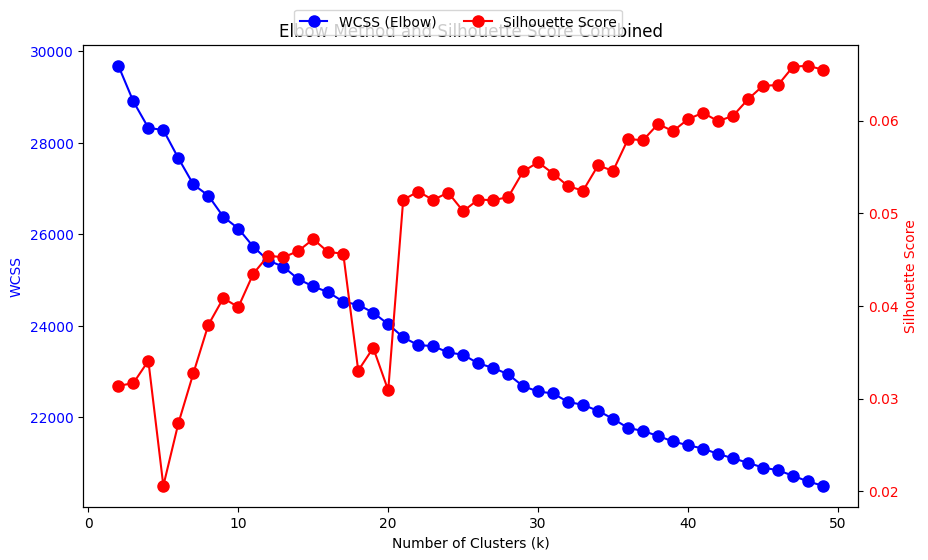

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters to test
k_range = range(2, 50)

# Variables to store metrics
wcss = []
silhouette_scores = []

# Compute metrics for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    wcss.append(kmeans.inertia_)  # WCSS for Elbow Method
    silhouette_scores.append(silhouette_score(embeddings, labels))  # Silhouette Score

# Plot both metrics
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS on the primary y-axis
ax1.plot(k_range, wcss, 'bo-', label='WCSS (Elbow)', markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Elbow Method and Silhouette Score Combined')

# Plot Silhouette Score on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score', markersize=8)
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

plt.show()


In [103]:
from sklearn.cluster import KMeans
from collections import Counter

# Determine the number of clusters (adjust as needed)
n_clusters = 9

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Map terms to their respective clusters
term_clusters = {term: f"Cluster {label}" for term, label in zip(all_keywords, labels)}

# Function to map terms to clusters
def map_to_clusters(terms):
    return [term_clusters[term] for term in terms]

# Apply the function to Keywords and Domains
df['Keyword Clusters'] = df['Keywords'].apply(map_to_clusters)



# Get the terms assigned to each cluster
cluster_terms = {i: [] for i in range(n_clusters)}
for term, label in zip(all_keywords, labels):
    cluster_terms[label].append(term)

# Generate cluster names based on most common terms
cluster_names = {}
for cluster, terms in cluster_terms.items():
    # Count term frequencies in the cluster
    term_counter = Counter(terms)
    # Use the top term(s) as the cluster name
    most_common = ', '.join([term for term, _ in term_counter.most_common(5)])
    cluster_names[cluster] = f"Cluster {cluster}: {most_common}"

# Print cluster names
for cluster, name in cluster_names.items():
    print(name)


Cluster 0: resilience assessment, statistical stability phenomenon, and resilience, resilience, susceptibility index
Cluster 1: as&op, immediate response, assets, definitions, it solution
Cluster 2: configuration optimization, location–allocation problem, evolutionary optimization, concurrent configuration, demand driven sales & operations planning
Cluster 3: risk identification, disaster preparedness, risk an opportunity management, homecare, risk engineering
Cluster 4: project success, operations research, process configuration, interoperability, panel layout design
Cluster 5: logistics, city logistics, last-mile delivery, containers, temporary distribution centers
Cluster 6: business modelling, model to model transformation, multi-view modeling method, online simulation, nonlinear systems
Cluster 7: data eco-system, artificial intelligence methods, agent-based, decision support system (dss), recommendation systems
Cluster 8: demand-supply alignment, customer-supplier relationship, s

In [104]:
from collections import Counter

# Handle empty or invalid entries gracefully
def get_most_common_cluster(clusters):
    if clusters and isinstance(clusters, list):  # Check if valid list
        return Counter(clusters).most_common(1)[0][0]  # Return most common cluster
    return None  # Return None if invalid or empty

# Apply the function to create the `Paper Cluster` column
df['Paper Cluster'] = df['Keyword Clusters'].apply(get_most_common_cluster)

# Explode authors if there are multiple authors per paper
df_exploded = df.explode('Author')

# Create a pivot table to count papers by author and cluster
author_cluster_matrix = (
    df_exploded.groupby(['Author', 'Paper Cluster'])
    .size()
    .unstack(fill_value=0)  # Fill missing combinations with 0
)

# Rename columns to include "Cluster" for clarity
author_cluster_matrix.columns = [f"Cluster {col}" for col in author_cluster_matrix.columns if col is not None]

# Display the matrix using Pandas
print(author_cluster_matrix)

# Optionally save to a file for further exploration
author_cluster_matrix.to_csv("author_cluster_matrix.csv", index=True)


                   Cluster Cluster 0  Cluster Cluster 1  Cluster Cluster 2  \
Author                                                                       
A. Fertier                         0                  0                  0   
Abdallah Karakra                   0                  0                  0   
Abdourahim Sylla                   1                  0                  0   
Achille Poirier                    0                  0                  0   
Alexandre Sarazin                  0                  1                  0   
...                              ...                ...                ...   
Yohann Chasseray                   0                  0                  1   
Zheng Jiang                        0                  0                  0   
Zhuo Ma                            0                  0                  0   
Ziqing Wu                          0                  2                  0   
Élise Vareilles                    1                  1         

In [105]:
df.to_csv('datas21.csv', index=0)

In [114]:
# Define custom names for clusters
cluster_names = {
    "Cluster 1": "Marketing",
    "Cluster 2": "Technology",
    "Cluster 3": "Healthcare",
    "Cluster 4": "Education",
    "Cluster 5": "Finance",
    "Cluster 6": "Environment",
    "Cluster 7": "Entertainment",
    "Cluster 8": "Research"
}


1      [Cluster 7, Cluster 7, Cluster 4, Cluster 2, C...
5      [Cluster 7, Cluster 7, Cluster 4, Cluster 2, C...
9           [Cluster 1, Cluster 7, Cluster 1, Cluster 3]
10     [Cluster 3, Cluster 1, Cluster 3, Cluster 3, C...
12          [Cluster 7, Cluster 1, Cluster 3, Cluster 3]
                             ...                        
298    [Cluster 5, Cluster 2, Cluster 2, Cluster 4, C...
299         [Cluster 4, Cluster 7, Cluster 4, Cluster 3]
300    [Cluster 7, Cluster 8, Cluster 8, Cluster 4, C...
301    [Cluster 1, Cluster 1, Cluster 1, Cluster 1, C...
302    [Cluster 5, Cluster 3, Cluster 8, Cluster 1, C...
Name: Keyword Clusters, Length: 272, dtype: object

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

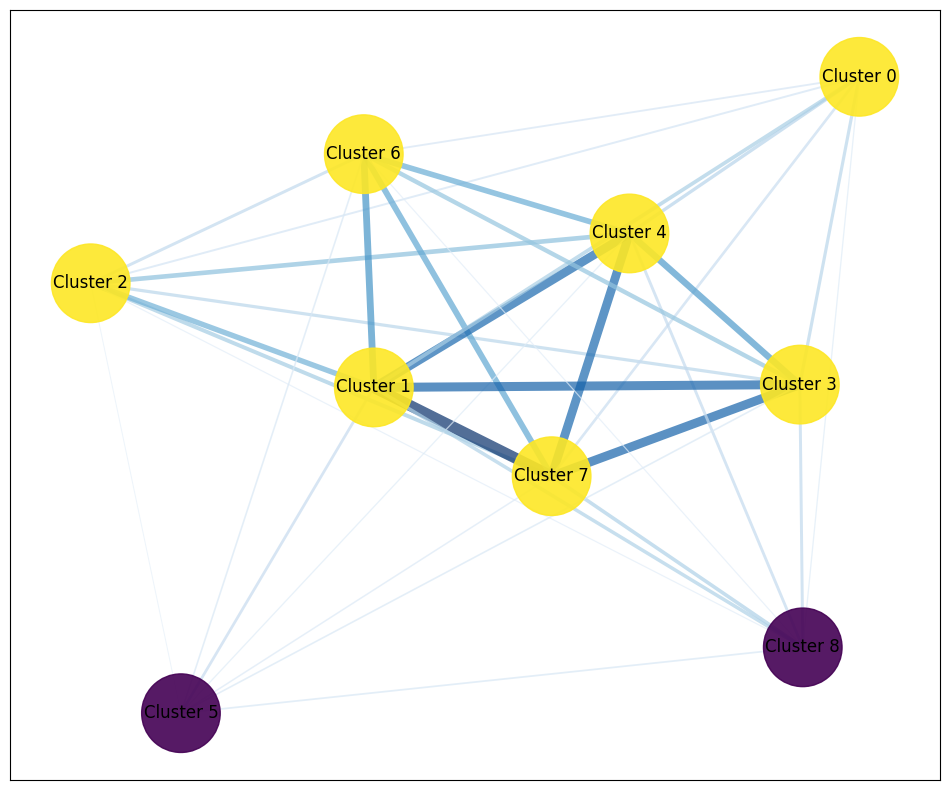

In [113]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from community import community_louvain


# Flatten and count co-occurrences
pair_counts = Counter()
for cluster_list in df["Keyword Clusters"]:
    for pair in combinations(set(cluster_list), 2):
        pair_counts[tuple(sorted(pair))] += 1

# Create graph
G = nx.Graph()
for (cluster1, cluster2), weight in pair_counts.items():
    G.add_edge(cluster1, cluster2, weight=weight)

# Compute modularity-based communities
partition = community_louvain.best_partition(G)
unique_communities = list(set(partition.values()))
community_colors = {community: idx for idx, community in enumerate(unique_communities)}
colors = [community_colors[partition[node]] for node in G.nodes()]

# Compute node sizes based on degree
node_sizes = [800 + 300 * G.degree(node) for node in G.nodes()]

# Normalize edge weights for transparency
all_weights = [G[u][v]['weight'] for u, v in G.edges()]
norm = Normalize(vmin=min(all_weights), vmax=max(all_weights))
edge_colors = [plt.cm.Blues(norm(weight)) for weight in all_weights]
edge_widths = [8 * norm(weight) for weight in all_weights]

# Map cluster names to their descriptive names
label_mapping = {node: cluster_names.get(node, node) for node in G.nodes()}

# Graph positions
pos = nx.spring_layout(G, seed=42)

# Plot combined enhanced graph
plt.figure(figsize=(12, 10))
nodes = nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, cmap=plt.cm.viridis, node_color=colors, alpha=0.9
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7)

# Use descriptive names as labels
nx.draw_networkx_labels(G, pos, labels=label_mapping, font_size=12, font_color="black")

# Add colorbar for communities
sm = ScalarMappable(cmap=plt.cm.viridis, norm=Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])  # Set an empty array for the ScalarMappable
plt.colorbar(sm, label="Community", orientation="vertical", shrink=0.8)

plt.title("Combined Enhanced Cluster Connections", fontsize=16)
plt.axis("off")
plt.show()

